In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dominance = pd.read_csv("Gachomba_et_al_2022/dominance_BLto5.csv", sep=';')
dominance

,pair,baselines,d1,d2,d3,d4,d5,avg5,dominance FD/FS
0,1,"54,45","43,9","53,13","47,37","47,22","62,75","50,874",0
1,2,"44,43","26,32","36,11","62,22","65,22","66,67","51,308",0
2,3,"50,37","61,22","76,92","67,5",74,"81,16","72,16",1
3,4,"44,47","56,67",44,"73,81","68,42","61,11","60,802",0
4,5,"53,64","51,52","40,63","54,17","63,64","72,88","56,568",0
5,6,"40,42","42,86","68,33","63,04","61,82","82,61","63,732",0
6,7,"43,78","47,37","79,63","60,87",75,"77,59","68,092",1
7,8,"35,52","53,33","53,66",60,"48,28","54,17","53,888",1
8,9,"40,89","61,76","81,82","72,73","66,67","67,27","70,05",1
9,10,"47,71",50,"80,43","78,57","91,3","78,69","75,798",1


In [27]:
dominance['baselines'].str.split(',', expand=True)

,0,1
0,54,45
1,44,43
2,50,37
3,44,47
4,53,64
5,40,42
6,43,78
7,35,52
8,40,89
9,47,71


In [41]:
# split by condition (in this case, dominant (C1) VS submissive (C2))
C1_dict = {}
C2_dict = {}
cols = ['baselines', 'd1', 'd2', 'd3', 'd4', 'd5']#, 'avg5']
for column in dominance.columns:
    if column in cols:
        splits = dominance[column].str.split(',', expand=True)
        C1_dict.update({column: splits[0].astype(float)}) 
        C2_dict.update({column: splits[1].astype(float)})

C1 = pd.DataFrame(C1_dict)
C2 = pd.DataFrame(C2_dict)
C1

,baselines,d1,d2,d3,d4,d5
0,54.0,43.0,53.0,47.0,47.0,62.0
1,44.0,26.0,36.0,62.0,65.0,66.0
2,50.0,61.0,76.0,67.0,74.0,81.0
3,44.0,56.0,44.0,73.0,68.0,61.0
4,53.0,51.0,40.0,54.0,63.0,72.0
5,40.0,42.0,68.0,63.0,61.0,82.0
6,43.0,47.0,79.0,60.0,75.0,77.0
7,35.0,53.0,53.0,60.0,48.0,54.0
8,40.0,61.0,81.0,72.0,66.0,67.0
9,47.0,50.0,80.0,78.0,91.0,78.0


In [42]:
C1.mean()

baselines    48.272727
d1           54.500000
d2           60.363636
d3           62.227273
d4           67.181818
d5           71.136364
dtype: float64

In [43]:
# using numpy / matplotlib
C1.to_numpy().mean(0)

array([48.27272727, 54.5       , 60.36363636, 62.22727273, 67.18181818,
       71.13636364])

In [48]:
C1_np = C1.to_numpy()
C2_np = C2.to_numpy()

<ErrorbarContainer object of 3 artists>

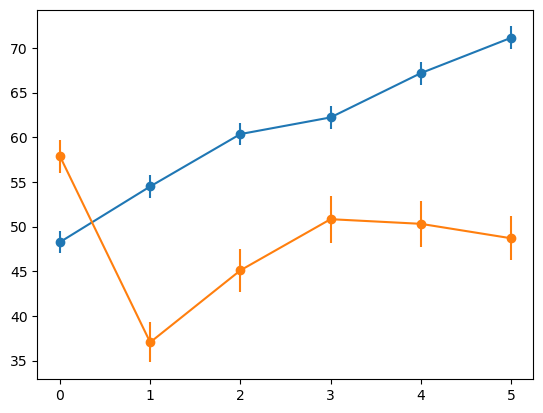

In [59]:
x = [0, 1, 2, 3, 4, 5]
x_labels = ['baselines', 'd1', 'd2', 'd3', 'd4', 'd5']
plt.errorbar(x, C1_np.mean(0), yerr=np.std(C1_np, ddof=1) / np.sqrt(np.size(C1_np)), marker='o')
plt.errorbar(x, np.nanmean(C2_np, 0), yerr=np.nanstd(C2_np, 0, ddof=1) / np.sqrt(np.size(C2_np)), marker='o')

ValueError: 'yerr' (shape: (6,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (22,))

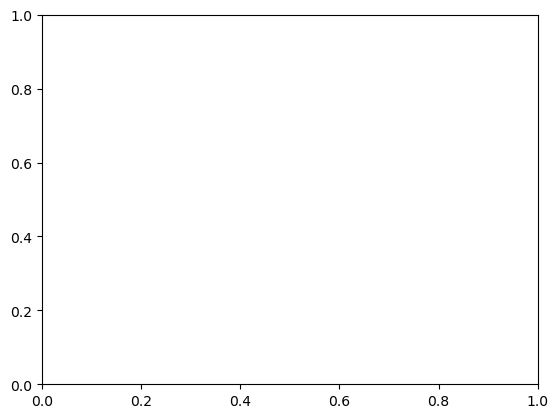

In [72]:
# using pandas / seaborn / scipy
from scipy.stats import sem
ax = C1.plot(yerr=sem(C1_np, 0))

In [73]:

from scipy.stats import sem
sem(C1_np)

array([1.44626975, 2.81134837, 3.63576835, 2.72230789, 3.01843998,
       2.12111162])